# Visualising the History of Nobel Prize Winners

## Instructions

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

* What is the most commonly awarded gender and birth country? Storing the string answers as `top_gender` and `top_country`.
* What decade had the highest proportion of US-born winners? Store this as an integer called `max_decade_usa`.
* What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value.
* Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as `first_woman_name` and `first_woman_category`.
* Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named `repeat_list`.

## Introduction

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# load libraries
import numpy as np
import seaborn as sns
import pandas as pd

# read data from file
nobel = pd.read_csv('nobel.csv')


In [4]:
# inspect the data
#print(nobel.head(5))
print(nobel.info()) 
print(nobel.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.

In [11]:
# top 5 birth_countries
print(nobel['birth_country'].value_counts().head(1))
top_country = nobel['birth_country'].value_counts().head(1).index[0]

# top  gender
print(nobel['sex'].value_counts().head(5))
top_gender = nobel['sex'].value_counts().head(1).index[0]


United States of America    291
Name: birth_country, dtype: int64
Male      905
Female     65
Name: sex, dtype: int64


## What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.

    decade  usa_born
0     1900  0.017544
1     1910  0.075000
2     1920  0.074074
3     1930  0.250000
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
7     1970  0.317308
8     1980  0.319588
9     1990  0.403846
10    2000  0.422764
11    2010  0.314050
12    2020  0.360000
2000
2000


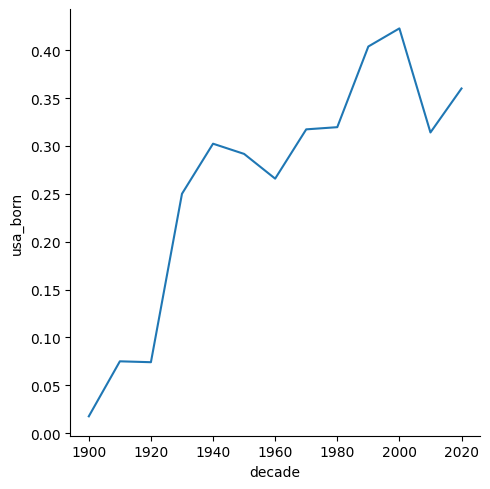

In [57]:
# copy the original dataframe for usa winners
nobel['usa_born'] = nobel['birth_country'] == 'United States of America'


# calculate decades into column
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# calculate the proportion of usa winners per decade
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born'].mean()
print(prop_usa_winners)

# get decade with max proportion of usa winners
max_decade_usa = prop_usa_winners['decade'][prop_usa_winners['usa_born'].idxmax()]
max_decade_usa_v2 = prop_usa_winners[prop_usa_winners['usa_born'] == prop_usa_winners['usa_born'].max()]['decade'].values[0]

print(max_decade_usa)
print(max_decade_usa_v2)

# Optional: Plotting USA born winners
import seaborn as sns
ax1 = sns.relplot(x='decade', y='usa_born', data=prop_usa_winners, kind="line")

## What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

In [64]:
# copy original dataframe for female laureates
nobel['female_winner'] = nobel['sex'] == 'Female'

# calculate decades into column
#nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# proportion of female winners per decade
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# max proportion
max_female_decade_prop = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# simpler max proportion: 
# max proportion
max_female_decade_prop = prop_female_winners.loc[prop_female_winners['female_winner'].idxmax(), ['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_prop['decade'].values[0]: max_female_decade_prop['category'].values[0]}


print(max_female_dict)

{2020: 'Literature'}


## Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.


In [38]:
# index of lowest year
index_of_first_woman = nobel_female['year'].idxmin()
#print(index_of_first_woman)
# use index to get full name
first_woman_name = nobel_female.loc[index_of_first_woman, 'full_name']
#print(first_woman_name)

first_woman_category = nobel_female.loc[index_of_first_woman, 'category']
#print(first_woman_category)

Physics


## Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

In [42]:
# individuals or organisations which have won multiple nobel prizes

# count the number of prizes for each individual
nobel['num_win'] = nobel.groupby('full_name')['full_name'].transform('count')
#print(nobel[(nobel['num_win'] > 1)].head(5))

# select only the unique names with more than 1 prize
repeat_list = nobel[(nobel['num_win'] > 1)]['full_name'].unique()
print(repeat_list)

['Marie Curie, née Sklodowska'
 'Comité international de la Croix Rouge (International Committee of the Red Cross)'
 'Linus Carl Pauling'
 'Office of the United Nations High Commissioner for Refugees (UNHCR)'
 'John Bardeen' 'Frederick Sanger']
